Задание: Дан датасет людей с разной степенью ожирения и возможными факторами. Требуется обучить и проверить модель предсказания степени ожирения в зависимости от этих факторов.

# **Описание и предобработка данных.**
 Общее описание и обзор датасета, работа с отсутствующими значениями.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df.tail()#проверка корректного чтения файла

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
dict = {'family_history_with_overweight':'family_overweight',
        'FAVC': 'caloric_food_frequency',
        'FCVC':'vegetables_frequency',
        'NCP':'meals_amount',
        'CAEC':'food_between_meals',
        'SCC': 'monitor_calories',
        'FAF':'physical_activity',
        'TUE':'devices_usage',
        'CALC': 'alcohol',
        'MTRANS':'transportation',
        'NObeyesdad':'obesity_level'}


df.rename(columns=dict, inplace=True)

In [ ]:
#Проверка, есть ли пропущенные значения
print(df.isnull().sum())
df[df.isnull().any(axis=1)]

Gender                    0
Age                       0
Height                    0
Weight                    0
family_overweight         0
caloric_food_frequency    0
vegetables_frequency      0
meals_amount              0
food_between_meals        0
SMOKE                     0
CH2O                      0
monitor_calories          0
physical_activity         0
devices_usage             0
alcohol                   0
transportation            0
obesity_level             0
dtype: int64


,Gender,Age,Height,Weight,family_overweight,caloric_food_frequency,vegetables_frequency,meals_amount,food_between_meals,SMOKE,CH2O,monitor_calories,physical_activity,devices_usage,alcohol,transportation,obesity_level


In [ ]:
# Вывод уникальных значений категориальных данных
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'Gender': ['Female' 'Male']
Уникальные значения в столбце 'family_overweight': ['yes' 'no']
Уникальные значения в столбце 'caloric_food_frequency': ['no' 'yes']
Уникальные значения в столбце 'food_between_meals': ['Sometimes' 'Frequently' 'Always' 'no']
Уникальные значения в столбце 'SMOKE': ['no' 'yes']
Уникальные значения в столбце 'monitor_calories': ['no' 'yes']
Уникальные значения в столбце 'alcohol': ['no' 'Sometimes' 'Frequently' 'Always']
Уникальные значения в столбце 'transportation': ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Уникальные значения в столбце 'obesity_level': ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
# One-hot и ordinal encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
dfNumeric = df.copy()

# Определение порядка значений
encoder1 = OrdinalEncoder(categories = [['no' , 'Sometimes', 'Frequently', 'Always'], ['no' , 'Sometimes', 'Frequently', 'Always']])
#применение ordinal encoding
dfNumeric[['food_between_meals', 'alcohol']] = encoder1.fit_transform(df[['food_between_meals', 'alcohol']])

encoder2 = OrdinalEncoder(categories = [['no' , 'yes'], ['no', 'yes'], ['no', 'yes'], ['no', 'yes'], ['Male', 'Female']])
dfNumeric[['family_overweight', 'caloric_food_frequency', 'SMOKE', 'monitor_calories', 'Gender']] = encoder2.fit_transform(df[['family_overweight', 'caloric_food_frequency', 'SMOKE', 'monitor_calories', 'Gender']])

encoder3 = OrdinalEncoder(categories = [['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
dfNumeric[['obesity_level']] = encoder3.fit_transform(df[['obesity_level']])

encoder4 = OneHotEncoder(sparse_output = False)
one_hot_transports = encoder4.fit_transform(df[['transportation']])

one_hot_df = pd.DataFrame(one_hot_transports, columns=encoder4.get_feature_names_out())
dfNumeric =  pd.concat([dfNumeric, one_hot_df], axis=1).drop('transportation', axis = 1)

dfNumeric.head()

,Gender,Age,Height,Weight,family_overweight,caloric_food_frequency,vegetables_frequency,meals_amount,food_between_meals,SMOKE,CH2O,monitor_calories,physical_activity,devices_usage,alcohol,obesity_level,transportation_Automobile,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
0,1.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0
4,0.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Проверка преобразований
dfNumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gender                                2111 non-null   float64
 1   Age                                   2111 non-null   float64
 2   Height                                2111 non-null   float64
 3   Weight                                2111 non-null   float64
 4   family_overweight                     2111 non-null   float64
 5   caloric_food_frequency                2111 non-null   float64
 6   vegetables_frequency                  2111 non-null   float64
 7   meals_amount                          2111 non-null   float64
 8   food_between_meals                    2111 non-null   float64
 9   SMOKE                                 2111 non-null   float64
 10  CH2O                                  2111 non-null   float64
 11  monitor_calories 

In [ ]:
dfNumeric.describe()

,Gender,Age,Height,Weight,family_overweight,caloric_food_frequency,vegetables_frequency,meals_amount,food_between_meals,SMOKE,CH2O,monitor_calories,physical_activity,devices_usage,alcohol,obesity_level,transportation_Automobile,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.112269,0.216485,0.003316,0.005211,0.748460,0.026528
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.985062,0.411946,0.057502,0.072015,0.434001,0.160737
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dfNumeric.to_csv('ObesityDataSet.csv', index = False) #сохранение датафрейма в файл csv

#**EDA**
## **Таргет (целевая переменная):**
*obesity_level* - уровень ожирения. Необходимо решить задачу классификации, где 'Insufficient_Weight' = 0, 'Normal_Weight' = 1, 'Overweight_Level_I' = 2, 'Overweight_Level_II' = 3, 'Obesity_Type_I' = 4,  'Obesity_Type_II' = 5, 'Obesity_Type_III' = 6

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [ ]:
df = pd.read_csv('ObesityDataSet.csv', header = 0)
df.head()

,Gender,Age,Height,Weight,family_overweight,caloric_food_frequency,vegetables_frequency,meals_amount,food_between_meals,SMOKE,CH2O,monitor_calories,physical_activity,devices_usage,alcohol,obesity_level,transportation_Automobile,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
0,1.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0
4,0.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df[['obesity_level']].describe() # описание таргета

,obesity_level
count,2111.000000
mean,3.112269
std,1.985062
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


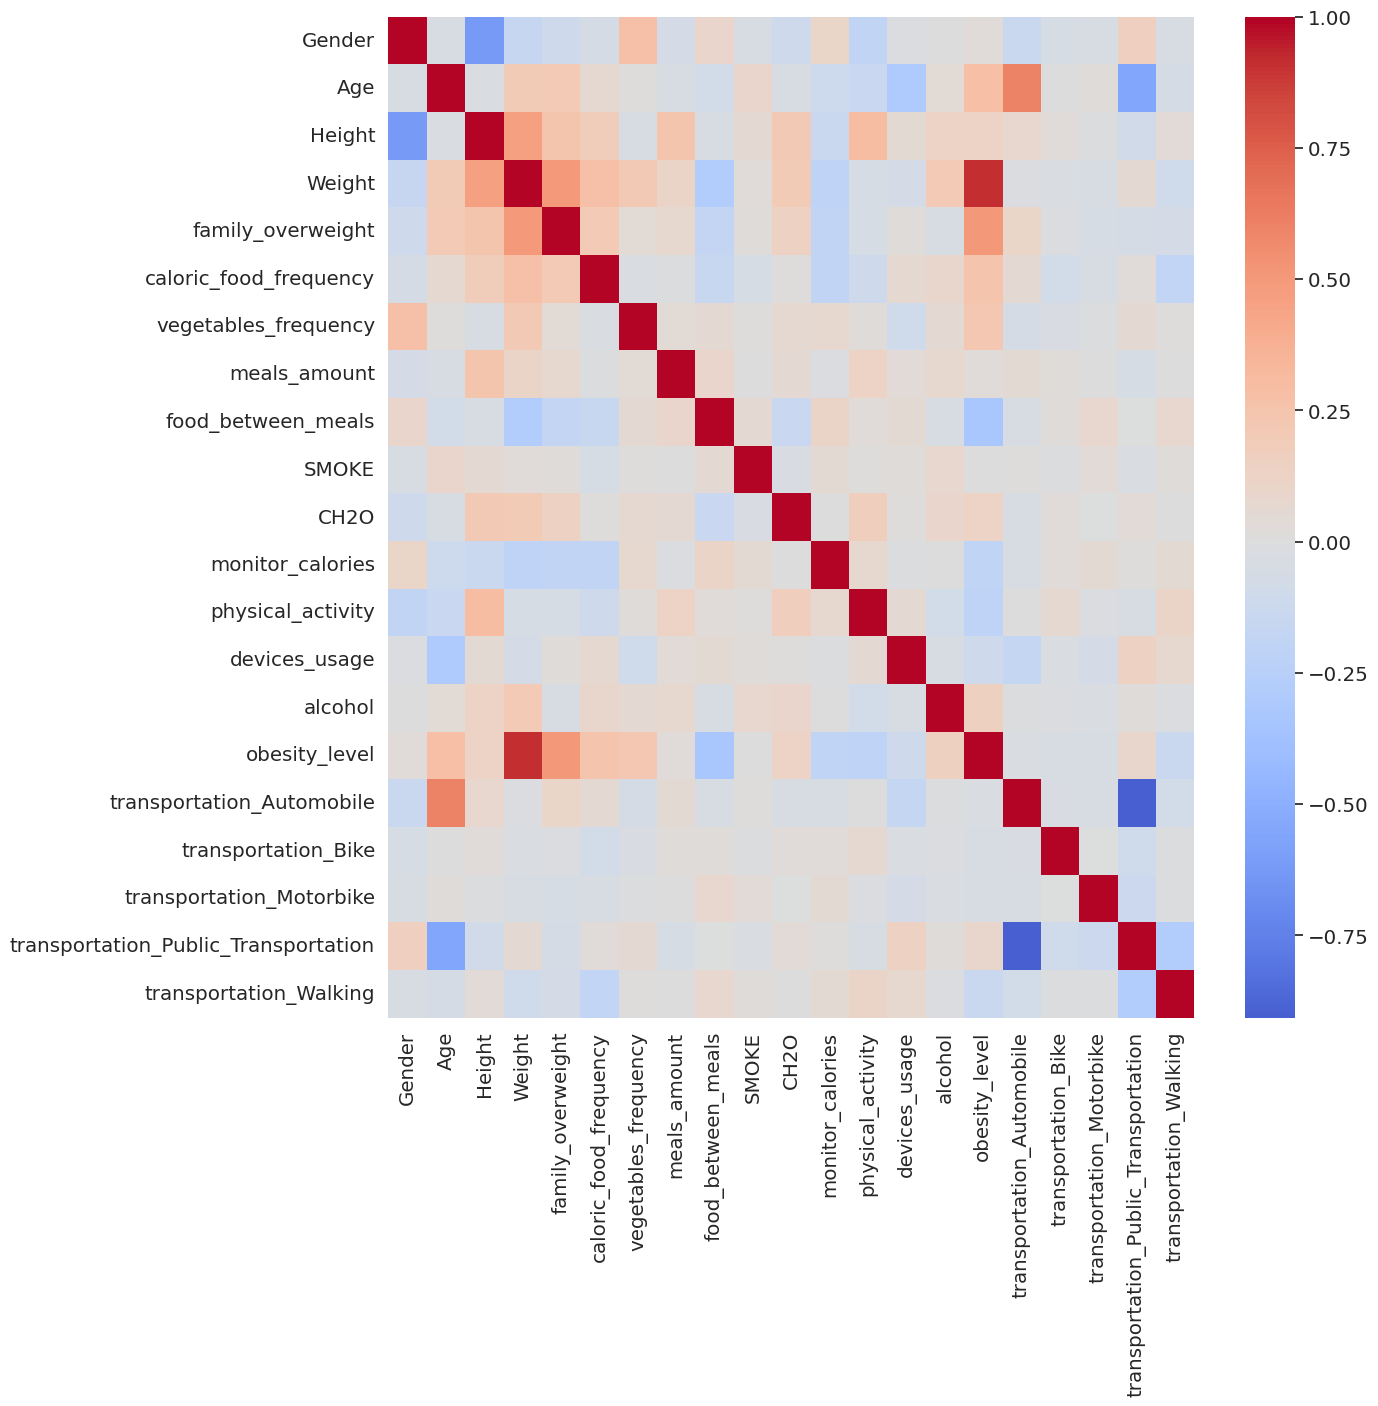

In [ ]:
# Вычисление корреляции между всеми столбцами
correlation_matrix = df.corr()
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center = 0)
plt.show()

In [ ]:
#Уровень ожирения и вес имеют сильную зависимость. Есть сильная отрицательная корреляция между transportation_Automobile и transportation_Public_Transportation.

In [ ]:
# Избавление от коррелирующих фич
print(df.shape[0], df[['transportation_Automobile']].sum()[0], df[['transportation_Public_Transportation']].sum()[0])

2111 457.0 1580.0


-1123.0

In [ ]:
#данные публичного транспорта более равномерны, так что лучше оставить этот столбец
df = df.drop('transportation_Automobile', axis = 1)

In [ ]:
df.head(3)

,Gender,Age,Height,Weight,family_overweight,caloric_food_frequency,vegetables_frequency,meals_amount,food_between_meals,SMOKE,CH2O,monitor_calories,physical_activity,devices_usage,alcohol,obesity_level,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
0,1.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


<Axes: xlabel='obesity_level', ylabel='count'>

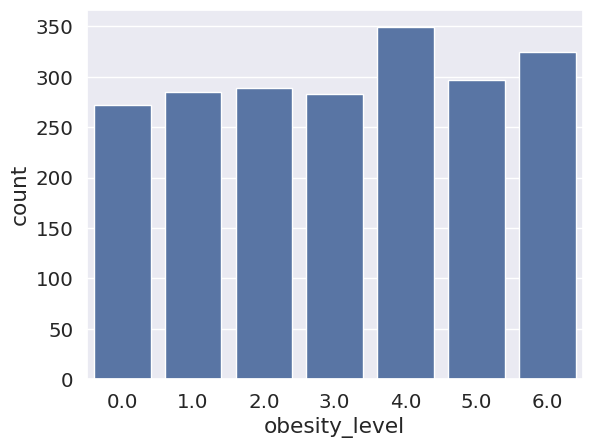

In [ ]:
sns.countplot(x='obesity_level',data = df) # таргет распределён достаточно равеномерно

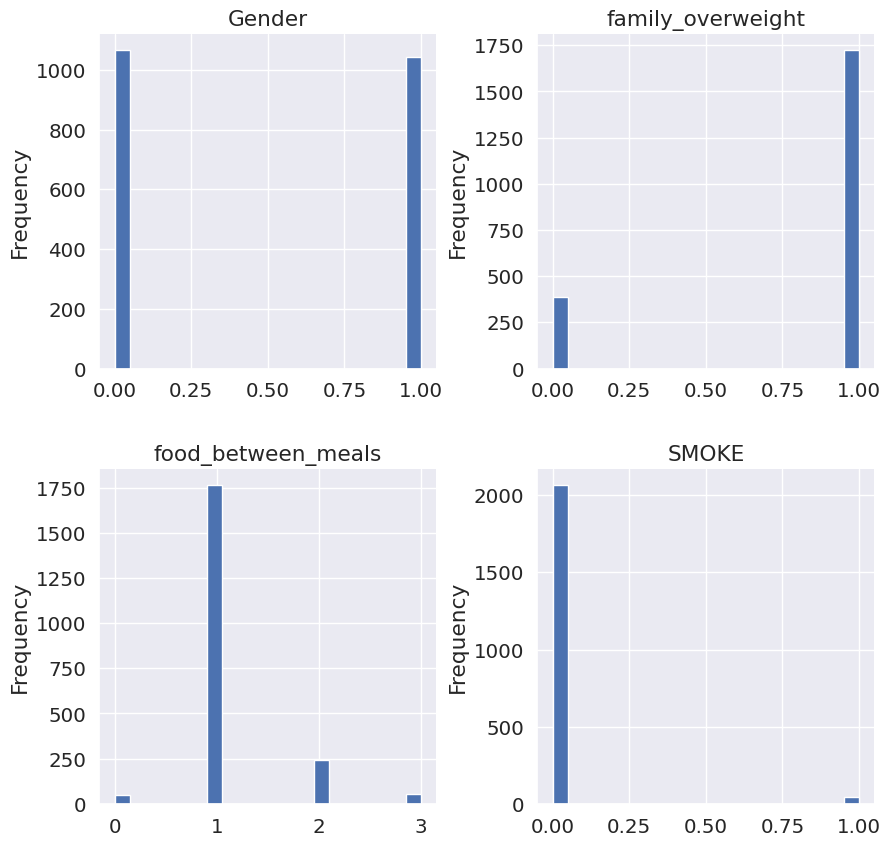

In [ ]:
fig, axs = plt.subplots( 2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=.3, wspace = .3)

plt.subplot(221)
df['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)
# равномерно

plt.subplot(222)
df['family_overweight'].plot(kind='hist', bins=20, title='family_overweight')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(223)
df['food_between_meals'].plot(kind='hist', bins=20, title='food_between_meals')
plt.gca().spines[['top', 'right',]].set_visible(False)


plt.subplot(224)
df['SMOKE'].plot(kind='hist', bins=20, title='SMOKE')
plt.gca().spines[['top', 'right',]].set_visible(False)
# почти нет значений 1

<ipython-input-29-8ccf4c5f78eb>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(311)


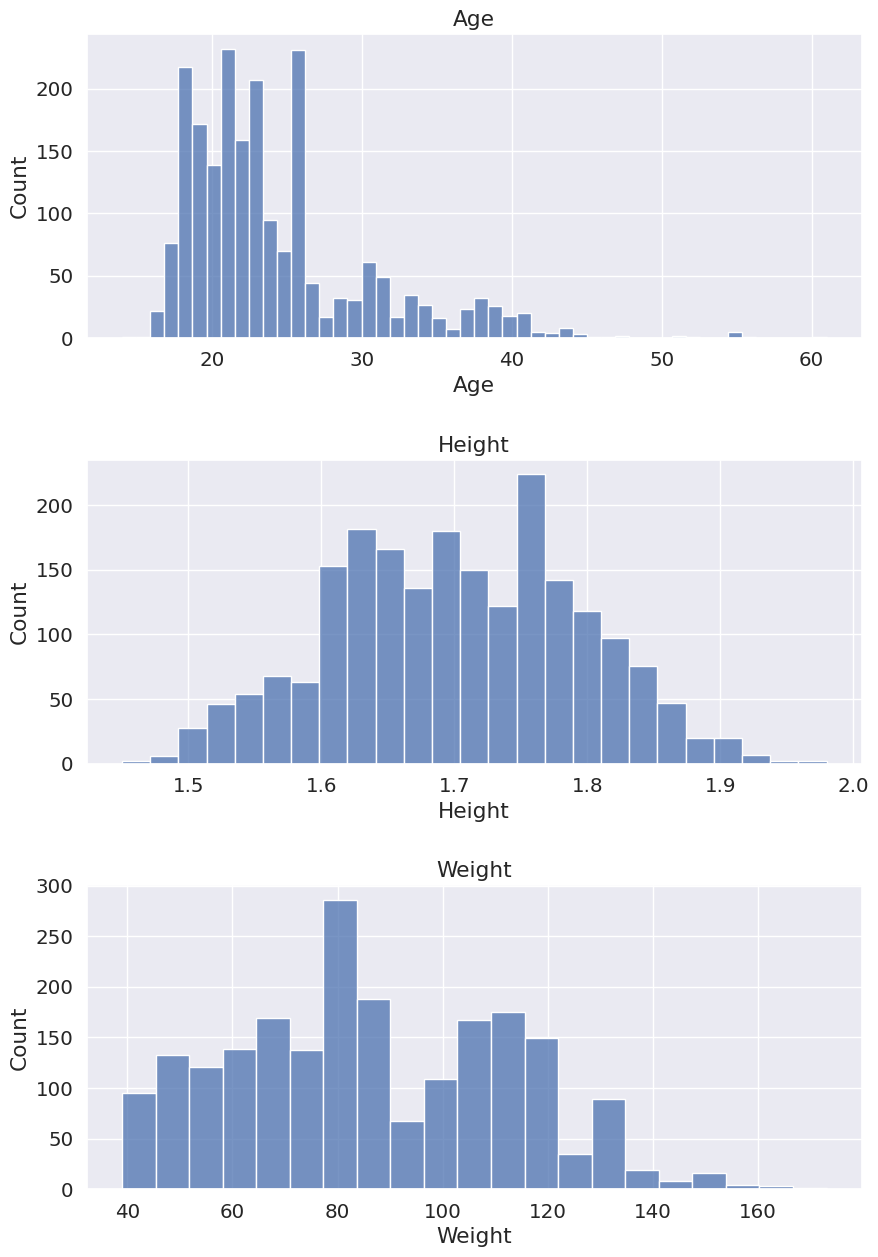

In [ ]:
#поиск выбросов

fig, axs = plt.subplots(1, 3, figsize=(10, 15))
plt.subplots_adjust(hspace=.4)

plt.subplot(311)
plt.title('Age')
sns.histplot(x = 'Age',data = df)

plt.subplot(312)
plt.title('Height')
sns.histplot(x = 'Height',data = df)

plt.subplot(313)
plt.title('Weight')
sns.histplot(x = 'Weight',data = df)

plt.show()

In [ ]:
#Есть выброс возраста - люди старше 47
print( df[df['Age'] >= 47].shape[0])
df = df[df['Age'] < 47]

12


<Axes: title={'center': 'Age'}, xlabel='Age', ylabel='Count'>

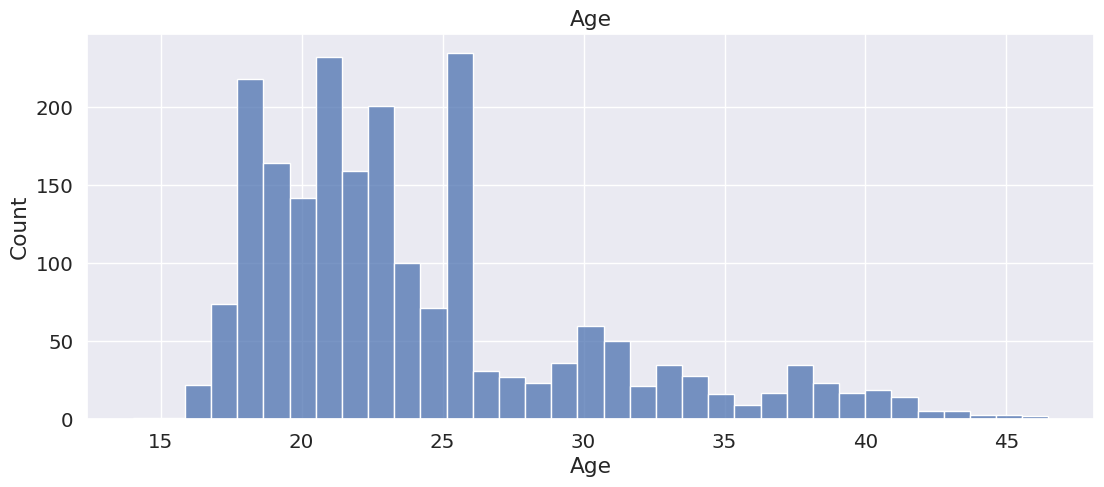

In [ ]:
plt.figure(figsize=(13, 5))
plt.title('Age')
sns.histplot(x = 'Age',data = df)

# **Подготовка данных и применение классификационной модели.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
y = df['obesity_level'] #столбец с ответами
X = df.drop('obesity_level', axis=1) #удаление из датафрейма ответов


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #разделение данных на обучающую и тестовую выборки

In [ ]:
# создание и обучение алгоритма
rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfModel.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Mean Squared Error: 0.08571428571428572
R^2 Score: 0.9791232597538698


In [ ]:
names = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
print(classification_report(y_test, y_pred, target_names = names))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.97        60
      Normal_Weight       0.82      0.95      0.88        61
 Overweight_Level_I       0.90      0.88      0.89        49
Overweight_Level_II       0.98      0.88      0.93        57
     Obesity_Type_I       0.98      0.97      0.98        66
    Obesity_Type_II       1.00      1.00      1.00        63
   Obesity_Type_III       1.00      1.00      1.00        64

           accuracy                           0.95       420
          macro avg       0.95      0.95      0.95       420
       weighted avg       0.95      0.95      0.95       420



In [ ]:
scores = cross_val_score( rfModel, X, y, cv=6)
scores
# кросс-валидация на первой части выборки имеет меньшую точность.

array([0.75142857, 0.97142857, 0.98571429, 0.97714286, 0.98571429,
       0.99140401])

In [ ]:
XNew = df.drop('SMOKE', axis=1)
XNew_train, XNew_test, yNew_train, yNew_test = train_test_split(XNew, y, test_size=0.2, random_state=0)

In [ ]:
rfModel2 = RandomForestClassifier()
rfModel2.fit(XNew_train, yNew_train)
yNew_pred = rfModel2.predict(XNew_test)
scores = cross_val_score( rfModel2, XNew, y, cv=6)
scores  # Без SMOKE точность очень высока

array([0.93142857, 0.99714286, 1.        , 1.        , 1.        ,
       1.        ])

In [ ]:
names = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
print(classification_report(yNew_test, yNew_pred, target_names = names))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        60
      Normal_Weight       1.00      1.00      1.00        61
 Overweight_Level_I       1.00      1.00      1.00        49
Overweight_Level_II       1.00      1.00      1.00        57
     Obesity_Type_I       1.00      1.00      1.00        66
    Obesity_Type_II       1.00      1.00      1.00        63
   Obesity_Type_III       1.00      1.00      1.00        64

           accuracy                           1.00       420
          macro avg       1.00      1.00      1.00       420
       weighted avg       1.00      1.00      1.00       420

